In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [212]:
dataset = pd.read_csv('AfterEngineeringFeatures_StrokesDataset.csv')

In [213]:
dataset

,Unnamed: 0,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,bmi_into_age,work_type_Never_worked,...,work_type_Self-employed,work_type_children,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_heart_disease
0,0,9046,1.052868,0,1,0.013074,1.270864,1,1.539504,0,...,0,0,1,0,1,1,1,0,0,0
1,1,51676,0.787951,0,0,0.013074,-0.022238,1,0.558633,0,...,1,0,0,0,1,0,0,1,0,0
2,2,31112,1.626856,0,1,0.686034,0.647132,1,1.735917,0,...,0,0,1,0,1,0,0,1,0,0
3,3,60182,0.258115,0,0,0.013074,0.936179,1,0.520759,0,...,0,0,0,0,1,1,0,0,1,0
4,4,1665,1.582703,1,0,0.013074,-0.645970,1,0.800362,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,5071,18234,1.626856,1,0,-0.361685,-0.022238,0,1.268140,0,...,0,0,0,0,1,1,0,1,0,0
5072,5072,44873,1.671009,0,0,1.597175,1.788105,0,2.586421,0,...,1,0,0,0,1,1,0,1,0,0
5073,5073,19723,-0.360026,0,0,-0.397601,0.358086,0,-0.295991,0,...,1,0,0,0,1,0,0,1,0,0
5074,5074,37544,0.346421,0,0,3.539022,-0.402562,0,0.015772,0,...,0,0,1,0,1,0,1,0,0,0


In [214]:
dataset.columns[0]

'Unnamed: 0'

In [215]:
dataset.drop([dataset.columns[0],"id"],axis=1,inplace=True)

In [216]:
dataset

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,bmi_into_age,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_heart_disease
0,1.052868,0,1,0.013074,1.270864,1,1.539504,0,1,0,0,1,0,1,1,1,0,0,0
1,0.787951,0,0,0.013074,-0.022238,1,0.558633,0,0,1,0,0,0,1,0,0,1,0,0
2,1.626856,0,1,0.686034,0.647132,1,1.735917,0,1,0,0,1,0,1,0,0,1,0,0
3,0.258115,0,0,0.013074,0.936179,1,0.520759,0,1,0,0,0,0,1,1,0,0,1,0
4,1.582703,1,0,0.013074,-0.645970,1,0.800362,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,1.626856,1,0,-0.361685,-0.022238,0,1.268140,0,1,0,0,0,0,1,1,0,1,0,0
5072,1.671009,0,0,1.597175,1.788105,0,2.586421,0,0,1,0,0,0,1,1,0,1,0,0
5073,-0.360026,0,0,-0.397601,0.358086,0,-0.295991,0,0,1,0,0,0,1,0,0,1,0,0
5074,0.346421,0,0,3.539022,-0.402562,0,0.015772,0,1,0,0,1,0,1,0,1,0,0,0


### Feature Selection

In [217]:
from sklearn.feature_selection import SelectKBest,f_classif
selector = SelectKBest(score_func=f_classif)
fits = selector.fit(dataset.drop("stroke",axis=1),dataset["stroke"])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(dataset.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
0,age,327.781140
5,bmi_into_age,244.541230
2,heart_disease,95.669866
1,hypertension,85.805126
12,ever_married_Yes,60.016818
9,work_type_children,35.990675
17,hypertension_heart_disease,33.832319
14,smoking_status_formerly smoked,22.592405
8,work_type_Self-employed,19.669067
4,bmi,15.149954


In [218]:
columns = fscores[fscores["Score"]>16]["Attribute"]

In [219]:
col = list(columns)

In [220]:
col

['age',
 'hypertension',
 'heart_disease',
 'bmi_into_age',
 'work_type_Self-employed',
 'work_type_children',
 'ever_married_Yes',
 'smoking_status_formerly smoked',
 'hypertension_heart_disease']

In [221]:
dataset[col]

,age,hypertension,heart_disease,bmi_into_age,work_type_Self-employed,work_type_children,ever_married_Yes,smoking_status_formerly smoked,hypertension_heart_disease
0,1.052868,0,1,1.539504,0,0,1,1,0
1,0.787951,0,0,0.558633,1,0,1,0,0
2,1.626856,0,1,1.735917,0,0,1,0,0
3,0.258115,0,0,0.520759,0,0,1,0,0
4,1.582703,1,0,0.800362,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
5071,1.626856,1,0,1.268140,0,0,1,0,0
5072,1.671009,0,0,2.586421,1,0,1,0,0
5073,-0.360026,0,0,-0.295991,1,0,1,0,0
5074,0.346421,0,0,0.015772,0,0,1,1,0


In [222]:
data = dataset[col]

In [223]:
target = dataset["stroke"]

In [224]:
target

0       1
1       1
2       1
3       1
4       1
       ..
5071    0
5072    0
5073    0
5074    0
5075    0
Name: stroke, Length: 5076, dtype: int64

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
X_train, X_test, y_train, y_test = train_test_split(data, target,
    test_size=0.2, shuffle = True, random_state = 8)
#X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.25,random_state=8)


In [227]:
X_train

,age,hypertension,heart_disease,bmi_into_age,work_type_Self-employed,work_type_children,ever_married_Yes,smoking_status_formerly smoked,hypertension_heart_disease
1944,-1.772919,0,0,-1.636333,0,1,0,0,0
3504,0.787951,0,0,0.437037,0,0,1,0,0
3845,-0.492484,1,0,-0.524298,0,0,0,1,0
2966,1.229480,0,1,1.328339,0,0,1,1,0
2150,-0.139261,0,0,-0.108614,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
2181,0.081504,1,0,0.654846,1,0,1,0,0
2409,0.832103,0,0,0.892589,0,0,0,0,0
2033,0.611339,0,0,0.969799,0,0,1,0,0
1364,0.920409,0,0,-0.196854,0,0,0,0,0


In [228]:
X_test

,age,hypertension,heart_disease,bmi_into_age,work_type_Self-employed,work_type_children,ever_married_Yes,smoking_status_formerly smoked,hypertension_heart_disease
515,-0.139261,0,0,-0.225559,0,0,1,0,0
1094,0.832103,0,0,1.115049,0,0,1,0,0
928,-1.066472,0,0,-1.143572,0,0,0,0,0
547,0.523033,0,0,0.356505,0,0,0,0,0
4688,1.494397,0,0,1.504022,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
3451,0.169810,0,0,0.048330,0,0,1,0,0
2659,0.213963,0,0,0.270923,0,0,1,1,0
2735,0.567186,0,0,0.193315,1,0,1,0,0
4172,-1.684613,0,0,-1.581715,0,1,0,0,0


In [229]:
X_val

,age,hypertension,heart_disease,bmi,bmi_into_age,work_type_Never_worked,work_type_Self-employed,work_type_children,ever_married_Yes,Residence_type_Urban,smoking_status_formerly smoked,hypertension_heart_disease
3206,0.567186,0,0,0.342873,0.550526,0,0,0,1,1,1,0
1345,1.097021,0,0,1.103521,1.488739,0,0,0,1,1,0,0
149,1.626856,0,0,0.890540,1.906018,0,1,0,1,1,0,0
1895,-1.684613,0,0,-1.695664,-1.605635,0,0,1,0,0,0,0
62,0.081504,0,0,0.297234,0.086736,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4089,-0.050955,0,0,-0.113516,-0.184363,0,0,0,1,0,0,0
384,1.185327,0,0,-0.828525,0.401688,0,0,0,1,0,1,0
1945,-1.110625,0,0,-0.676395,-1.149951,0,0,0,0,0,0,0
2901,-1.552155,0,0,-0.235220,-1.435401,0,0,1,0,0,0,0


In [230]:
from sklearn.linear_model import LogisticRegression

In [231]:
from sklearn.model_selection import GridSearchCV

In [232]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [233]:
LogisticReg = LogisticRegression()

In [234]:
logreg_cv = GridSearchCV(LogisticReg, param_grid, cv = 5)

In [235]:
 logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [236]:
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1e-05}
Best score is 0.951231527093596


In [237]:
C = logreg_cv.best_params_['C']

In [238]:
logreg_imbalanced = LogisticRegression(C=C)

In [239]:
logreg_imbalanced.fit(X_train,y_train)

LogisticRegression(C=1e-05)

In [240]:
predictions = logreg_imbalanced.predict(X_test)

In [241]:
metrics.f1_score(y_test,predictions)

0.0

In [242]:
logreg = LogisticRegression(class_weight='balanced')

In [243]:
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
logreg_cv.fit(X_train,y_train)
C = logreg_cv.best_params_['C']

In [244]:
logreg = LogisticRegression(class_weight='balanced')

In [245]:
logreg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [246]:
predictions = logreg.predict(X_test)

In [247]:
from sklearn import metrics

In [248]:
metrics.f1_score(y_test,predictions)

0.20634920634920637

In [207]:
metrics.accuracy_score(y_test,predictions)

0.7086614173228346

<AxesSubplot:>

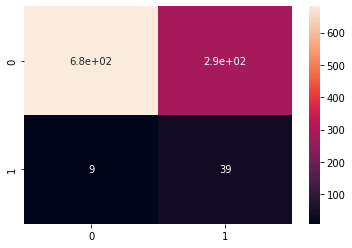

In [210]:
sns.heatmap(metrics.confusion_matrix(y_test,predictions),annot=True)

In [106]:
from sklearn.model_selection import KFold

In [188]:
from sklearn.model_selection import StratifiedKFold

In [190]:
crossvali =StratifiedKFold(n_splits=10,shuffle=False)

In [191]:
for train_index,test_index in crossvali.split(data,target):
    print("Train Index: ",train_index,"\n")
    print("Test Index: ",test_index,"\n")
    print("Train Length: ",len(train_index))
    LogisticReg = LogisticRegression(C=0.001)
    X_train,X_test,Y_train,Y_test = data.iloc[train_index],data.iloc[test_index],target[train_index],target[test_index]
    LogisticReg.fit(X_train,Y_train)
    scores.append(LogisticReg.score(X_test,Y_test))

Train Index:  [  25   26   27 ... 5073 5074 5075] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24 246 247 248 249 250 251 252 253 254 255 256
 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274
 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292
 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310
 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328
 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346
 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364
 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382
 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400
 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418
 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436
 437 438 439 440 441 442 443 444 445 446 447 448 449 450 45

Train Index:  [   0    1    2 ... 5073 5074 5075] 

Test Index:  [ 150  151  152  153  154  155  156  157  158  159  160  161  162  163
  164  165  166  167  168  169  170  171  172  173 3144 3145 3146 3147
 3148 3149 3150 3151 3152 3153 3154 3155 3156 3157 3158 3159 3160 3161
 3162 3163 3164 3165 3166 3167 3168 3169 3170 3171 3172 3173 3174 3175
 3176 3177 3178 3179 3180 3181 3182 3183 3184 3185 3186 3187 3188 3189
 3190 3191 3192 3193 3194 3195 3196 3197 3198 3199 3200 3201 3202 3203
 3204 3205 3206 3207 3208 3209 3210 3211 3212 3213 3214 3215 3216 3217
 3218 3219 3220 3221 3222 3223 3224 3225 3226 3227 3228 3229 3230 3231
 3232 3233 3234 3235 3236 3237 3238 3239 3240 3241 3242 3243 3244 3245
 3246 3247 3248 3249 3250 3251 3252 3253 3254 3255 3256 3257 3258 3259
 3260 3261 3262 3263 3264 3265 3266 3267 3268 3269 3270 3271 3272 3273
 3274 3275 3276 3277 3278 3279 3280 3281 3282 3283 3284 3285 3286 3287
 3288 3289 3290 3291 3292 3293 3294 3295 3296 3297 3298 3299 3300 3301
 3302 3303 3

In [194]:
np.average(scores)

0.9515375297022782

In [59]:
X_val

,age,hypertension,heart_disease,bmi_into_age,ever_married_Yes,hypertension_heart_disease
3206,0.567186,0,0,0.550526,1,0
1345,1.097021,0,0,1.488739,1,0
149,1.626856,0,0,1.906018,1,0
1895,-1.684613,0,0,-1.605635,0,0
62,0.081504,0,0,0.086736,1,0
...,...,...,...,...,...,...
4089,-0.050955,0,0,-0.184363,1,0
384,1.185327,0,0,0.401688,1,0
1945,-1.110625,0,0,-1.149951,0,0
2901,-1.552155,0,0,-1.435401,0,0


In [20]:
X_train

,age,hypertension,heart_disease,bmi_into_age,ever_married_Yes,hypertension_heart_disease
0,1.052868,0,1,1.539504,1,0
1,0.787951,0,0,0.558633,1,0
2,1.626856,0,1,1.735917,1,0
3,0.258115,0,0,0.520759,1,0
4,1.582703,1,0,0.800362,1,0
...,...,...,...,...,...,...
4564,-1.110625,0,0,-1.245633,0,0
4565,-0.624943,0,0,-0.751941,1,0
4566,0.567186,0,0,1.056577,1,0
4567,-0.448331,0,0,-0.390477,1,0


In [21]:
X_test

,age,hypertension,heart_disease,bmi_into_age,ever_married_Yes,hypertension_heart_disease
4569,-0.315873,0,0,-0.518451,1,0
4570,-0.580790,0,0,-0.654798,0,0
4571,-0.536637,0,0,-0.512205,0,0
4572,-1.198931,0,0,-0.896394,0,0
4573,0.655492,0,0,1.040098,1,0
...,...,...,...,...,...,...
5071,1.626856,1,0,1.268140,1,0
5072,1.671009,0,0,2.586421,1,0
5073,-0.360026,0,0,-0.295991,1,0
5074,0.346421,0,0,0.015772,1,0


In [22]:
Y_train

0       1
1       1
2       1
3       1
4       1
       ..
4564    0
4565    0
4566    0
4567    0
4568    0
Name: stroke, Length: 4569, dtype: int64

In [24]:
4569+507

5076